In [48]:
import sqlite3
import pandas as pd
import seaborn as sns


[Text(0.5, 1.0, 'Top user artists popularity')]

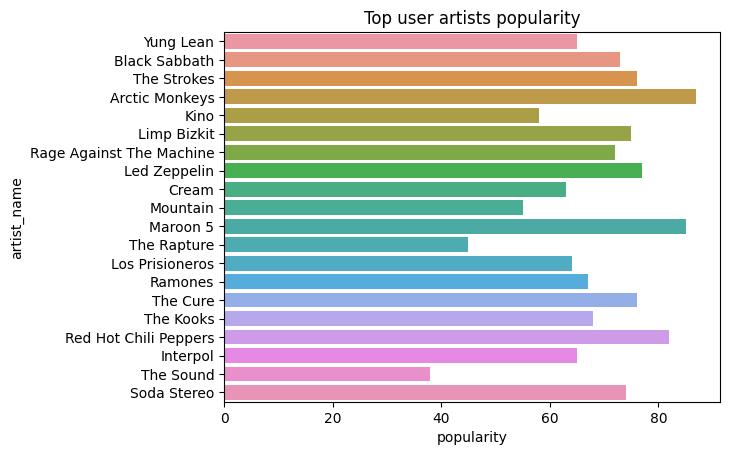

In [49]:
conn = sqlite3.connect("user_data_spotify.db")

query = "SELECT * FROM user_top_artists"

artists_df = pd.read_sql_query(query, conn)

sns.barplot(data=artists_df, x=artists_df["popularity"], y=artists_df["artist_name"]).set(title="Top user artists popularity")

